# 深度学习与自然语言处理第三次大作业——LDA模型文本建模

## 19231178 于天贺

## 一、实验目标
从链接给定的语料库中均匀抽取200个段落（每个段落大于500个词）， 每个段落的标签就是对应段落所属的小说。利用LDA模型对于文本建模，并把每个段落表示为主题分布后进行分类。验证与分析分类结果，（1）在不同数量的主题个数下分类性能的变化；（2）以"词"和以"字"为基本单元下分类结果有什么差异？      

## 二、实验原理

### 2.1.LDA模型

LDA (Latent Dirichlet Allocation) 是一种主题模型，用于从大量文档中发现潜在的主题。这里，我将简要介绍 LDA 模型的原理推导。这个推导过程涉及到生成式概率模型，以及使用贝叶斯推理进行参数估计。

LDA 的基本思想是，给定一个文档集合，每个文档都可以被表示为一个主题的概率分布。每个主题又可以被表示为一个单词的概率分布。

我们可以用以下符号表示 LDA 模型：

$D$ : 文档数量

$N_d$ : 文档 $d$ 中的单词数量

$K$ : 主题数量

$M$ : 词汇表大小

$\alpha$ : 主题分布的狄利克雷先验参数

$\beta$ : 单词分布的狄利克雷先验参数

$\theta_d$ : 文档 $d$ 的主题分布, 其中 $d \in {1, \dots, D}$

$\phi_k$ : 主题 $k$ 的单词分布, 其中 $k \in {1, \dots, K}$

$z_{d,n}$ : 文档 $d$ 中第 $n$ 个单词的主题分配

$w_{d,n}$ : 文档 $d$ 中第 $n$ 个单词

LDA 的生成过程如下

对于每个主题 $k$：从狄利克雷分布中采样一个单词分布 $\phi_k \sim Dirichlet(\beta)$

对于每个文档 $d$：从狄利克雷分布中采样一个主题分布 $\theta_d \sim Dirichlet(\alpha)$

对于文档 $d$ 中的每个单词 $n$：从主题分布 $\theta_d$ 中采样一个主题 $z_{d,n} \sim Multinomial(\theta_d)$

从单词分布 $\phi_{z_{d,n}}$ 中采样一个单词 $w_{d,n} \sim Multinomial(\phi_{z_{d,n}})$
我们的目标是根据观测到的文档集合（单词）来估计主题和单词的分布。这可以通过最大化联合概率分布来实现：

$p(\theta, \phi, z | w, \alpha, \beta) = p(\theta | \alpha) p(\phi | \beta) p(z | \theta) p(w | z, \phi)$

由于直接优化联合概率分布非常困难，我们通常使用变分推断（Variational Inference）或吉布斯抽样（Gibbs Sampling）等近似方法进行参数估计。

注意：为了简化表示和计算，我们可以将联合概率分布表示为条件概率的乘积。我们的目标是找到参数 $\theta$ 和 $\phi$ 的后验分布，即 $p(\theta, \phi, z | w, \alpha, \beta)$。我们可以将这个分布分解为以下形式：

$p(\theta, \phi, z | w, \alpha, \beta) = \frac{p(\theta, \phi, z, w | \alpha, \beta)}{p(w | \alpha, \beta)}$

其中，

$p(\theta, \phi, z, w | \alpha, \beta) = \prod_{d=1}^D p(\theta_d | \alpha) \left[ \prod_{n=1}^{N_d} p(z_{d,n} | \theta_d) p(w_{d,n} | z_{d,n}, \phi) \right] \prod_{k=1}^K p(\phi_k | \beta)$

现在，我们的目标是估计后验分布 $p(\theta, \phi, z | w, \alpha, \beta)$。由于计算这个分布通常是不可解的，我们通常采用变分推断（Variational Inference）或吉布斯抽样（Gibbs Sampling）等近似方法进行参数估计。

对于变分推断，我们引入一个变分分布 $q(\theta, \phi, z)$ 来近似后验分布。我们可以使用变分贝叶斯（Variational Bayes）方法优化变分分布的参数，以便最小化变分分布与真实后验分布之间的KL散度（Kullback-Leibler Divergence）：

$KL(q(\theta, \phi, z) || p(\theta, \phi, z | w, \alpha, \beta))$

对于吉布斯抽样，我们通过循环地从条件概率分布中采样参数来得到参数的后验分布的样本。在 LDA 中，我们主要关注的是两个条件概率分布：$p(z_{d,n} | z_{-d,n}, w, \alpha, \beta)$ 和 $p(\theta, \phi | z, w, \alpha, \beta)$。在抽样过程中，我们固定其他变量并更新当前变量。

迭代进行吉布斯抽样后，我们可以从样本中估计参数 $\theta$ 和 $\phi$。最终，我们可以得到每个文档的主题分布和每个主题的单词分布，从而可以分析文档集合中的潜在主题结构。

### 2.2.SVM分类器

SVM（Support Vector Machine）是一种常用的分类算法，它可以用于二分类和多分类问题。SVM 的核心思想是找到一个能够将数据集划分成两个类别的最优超平面，即将两个类别的数据分开的间隔最大的超平面。

在二维空间中，超平面可以被看作是一条直线，它可以将数据点分成两类。在三维空间中，超平面可以被看作是一个平面，它同样可以将数据点分成两类。在高维空间中，超平面可以被看作是一个超平面，它同样可以将数据点分成两类。

SVM 的训练过程可以用以下几个步骤来描述：

选择一个合适的核函数（Kernel Function），将数据映射到高维空间中。常用的核函数有线性核、多项式核和高斯核等。
找到一个超平面，使得这个超平面能够将数据点分成两类，并且两个类别之间的间隔最大化。
根据样本的标签，确定数据点在超平面的哪一侧，从而进行分类。

总之，SVM 是一种强大的分类算法，适用于处理高维数据和二分类问题，但需要注意它的训练时间和噪声数据对算法的影响。

## 三、实验过程、实验结果与结果分析

### 3.1.声明使用的库

In [55]:
import os
import random
import jieba
import re
import time
import numpy as np
from gensim import corpora, models
from sklearn.svm import SVC

### 3.2.定义读取数据并进行预处理的类

In [57]:
class ReadFile:
    def __init__(self, root_dir, stop_words_path):
        self.root_dir = root_dir
        self.stop_words_path = stop_words_path

    def get_corpus(self):
        with open(self.stop_words_path, 'r', encoding='utf-8') as stop_words_file:
            stop_words = [line.strip() for line in stop_words_file.readlines()]

        text_dict = {}

        r1 = '[a-zA-Z0-9’!"#$%&\'()*+,-./:：;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
        listdir = os.listdir(self.root_dir)

        for file_name in listdir:
            path = os.path.join(self.root_dir, file_name)
            if os.path.isfile(path) and file_name.split('.')[-1] == 'txt' and file_name != 'inf.txt':
                with open(os.path.abspath(path), "r", encoding='ansi') as file:
                    file_content = file.read()

                file_content = file_content. \
                    replace("本书来自www.cr173.com免费txt小说下载站", '')
                file_content = file_content. \
                    replace("更多更新免费电子书请关注www.cr173.com", '')
                file_content = re.sub(r1, '', file_content)
                file_content = file_content.replace("\n", '')
                file_content = file_content.replace(" ", '')
                file_content = file_content.replace('\u3000', '')

                new_words_lst = []
                split_words = list(jieba.cut(file_content))
                for word in split_words:
                    if word not in stop_words:
                        new_words_lst.append(word)

                print(file_name.split('.')[0], '总词数：', len(new_words_lst))
                
                text_dict[file_name.split('.')[0]] = new_words_lst

            elif os.path.isdir(path):
                print('文件路径不存在!!!!!!')
        return text_dict

### 3.3.读取数据并存储在字典中

In [59]:
read_file = ReadFile(root_dir="./jyxstxtqj_downcc.com", stop_words_path='./停词表.txt')
text_dict = read_file.get_corpus()

三十三剑客图 总词数： 22179
书剑恩仇录 总词数： 174237
侠客行 总词数： 118939
倚天屠龙记 总词数： 322100
天龙八部 总词数： 397971
射雕英雄传 总词数： 304708
白马啸西风 总词数： 22322
碧血剑 总词数： 163314
神雕侠侣 总词数： 326467
笑傲江湖 总词数： 316834
越女剑 总词数： 5668
连城诀 总词数： 75150
雪山飞狐 总词数： 45289
飞狐外传 总词数： 148547
鸳鸯刀 总词数： 11756
鹿鼎记 总词数： 396105


### 3.4.定义主函数用于对段落进行分类

In [87]:
def main(text_dict, paragraph_num=15, paragraph_length=500, num_topics=10, use_character=False, random_consistent=True, random_seed=0):
    
    # 将元素为词的列表转化为字
    if use_character:
        for label, text in text_dict.items():
            text_dict[label] = list(''.join(text))
    
    # 从每篇文章中抽取一定长度一定数量的段落
    text_lst = []
    label_lst = []
    for label, text in text_dict.items():
        for i in range(0, paragraph_num):
            label_lst.append(label)
            if random_consistent:
                random.seed(random_seed)
            random_int = random.randint(0, len(text)-paragraph_length-1)
            text_lst.append(text[random_int:random_int+paragraph_length])
    
    
    # 将标签列表从字符串形式映射为整数形式
    label_dict = {}
    for label in label_lst:
        if label not in label_dict:
            label_dict[label] = len(label_dict)
    # print(label_dict)
    int_label_lst = list(map(lambda x: label_dict[x], label_lst))

    # 保证标签列表与文本列表长度相同
    assert len(int_label_lst) == len(text_lst)

    # 生成一个打乱顺序的索引
    if random_consistent:
        np.random.seed(random_seed)
    indices = np.random.permutation(len(int_label_lst))

    # 使用索引将标签列表和数据列表的顺序按照相同方式打乱
    int_label_list = [int_label_lst[i] for i in indices]
    text_list = [text_lst[i] for i in indices]

    # 划分训练集与测试集
    train_p = 0.6
    label_train = int_label_list[0:int(len(int_label_list)*train_p)]
    label_test = int_label_list[int(len(int_label_list)*train_p):]
    text_train = text_list[0:int(len(text_list)*train_p)]
    text_test = text_list[int(len(int_label_list)*train_p):]

    # 将文本列表转化为LDA模型需要的输入——文本向量
    dictionary = corpora.Dictionary(text_list)
    corpus_train = [dictionary.doc2bow(doc) for doc in text_train]
    corpus_test = [dictionary.doc2bow(doc) for doc in text_test]

    #print('训练集段落数:',len(corpus_train))
    #print('测试集段落数:',len(corpus_test))
    
    # 训练LDA模型
    lda = models.LdaModel(corpus=corpus_train, id2word=dictionary, num_topics=num_topics)
    
    # 获取训练集和测试集的每个段落的主题分布
    topics_train = lda.get_document_topics(corpus_train, minimum_probability=0)
    topics_test = lda.get_document_topics(corpus_test, minimum_probability=0)
    feature_train = []
    feature_test = []

    for i in range(0, len(topics_train)):
        feature_train.append([k[1] for k in topics_train[i]])

    for i in range(0, len(topics_test)):
        feature_test.append([k[1] for k in topics_test[i]])

    print('训练集特征矩阵大小为:', np.array(feature_train).shape)
    print('测试集特征矩阵大小为:', np.array(feature_test).shape)
    
    # 定义SVM分类器
    clf = SVC(kernel='rbf', decision_function_shape='ovr')

    # 训练模型
    clf.fit(feature_train, label_train)

    # 测试模型
    predict_train = clf.predict(feature_train)
    predict_test = clf.predict(feature_test)
    
    print(list(predict_test))
    print(label_test)
    
    accuracy_train = clf.score(feature_train, label_train)
    print(f'Train Accuracy: {100*accuracy_train:.2f}%')
    accuracy_test = clf.score(feature_test, label_test)
    print(f'Test Accuracy: {100*accuracy_test:.2f}%')
    
    return accuracy_train, accuracy_test

### 3.5.固定段落数paragraph_num与段落词数paragraph_length，观察主题数num_topics对训练集与测试集分类准确率的影响

这里设置每篇小说抽取段落数为20，每个段落长度为500词，主题分别设置为[1,5,10,20,30,40,50,100,200,300,400,500]，训练集与测试集为6:4

In [88]:
num_topics_lst = [1,5,10,20,30,40,50,100,200,300,400,500]
accuracy_train_lst = []
accuracy_test_lst = []
for num_topics in num_topics_lst:
    accuracy_train, accuracy_test = main(text_dict, paragraph_num=20, paragraph_length=500, num_topics=num_topics, use_character=False, random_consistent=False)
    accuracy_train_lst.append(accuracy_train)
    accuracy_test_lst.append(accuracy_test)

训练集特征矩阵大小为: (192, 1)
测试集特征矩阵大小为: (128, 1)
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[0, 3, 8, 8, 11, 8, 1, 5, 10, 11, 11, 13, 12, 6, 15, 15, 5, 14, 3, 4, 14, 5, 0, 12, 13, 3, 10, 8, 13, 12, 13, 3, 0, 4, 3, 7, 9, 10, 6, 13, 5, 2, 14, 15, 11, 0, 0, 15, 12, 7, 4, 1, 10, 11, 8, 6, 10, 15, 4, 1, 7, 2, 0, 0, 8, 0, 0, 8, 14, 3, 14, 13, 12, 6, 4, 15, 4, 12, 2, 8, 7, 8, 6, 8, 3, 6, 11, 14, 10, 15, 10, 1, 14, 7, 15, 9, 12, 0, 4, 15, 5, 11, 13, 0, 9, 11, 13, 13, 0, 3, 13, 13, 14, 12, 14, 13, 11, 2, 0, 4, 14, 12, 3, 7, 14, 8, 9, 14]
Train Accuracy: 8.33%
Test Accuracy: 3.12%
训练集特征矩阵大小为: (192, 5)
测试集特征矩阵大小为: (128, 5)
[5, 1, 10, 5, 10, 14, 5, 5, 5, 5, 5, 1, 5, 14

训练集特征矩阵大小为: (192, 300)
测试集特征矩阵大小为: (128, 300)
[6, 6, 15, 6, 6, 6, 6, 13, 6, 14, 6, 3, 6, 12, 6, 1, 6, 6, 6, 10, 6, 14, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 14, 6, 6, 6, 6, 0, 14, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 10, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 14, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 14, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 12, 6, 6, 10, 6, 6, 6, 6, 6, 6, 11, 6, 6, 6, 6, 6, 6, 14, 6, 6, 6, 6, 6, 6]
[7, 13, 15, 11, 12, 4, 15, 13, 9, 14, 1, 3, 6, 12, 6, 1, 12, 13, 8, 10, 2, 14, 0, 4, 13, 8, 1, 4, 4, 9, 12, 12, 4, 12, 2, 14, 15, 9, 7, 2, 0, 14, 4, 7, 15, 8, 2, 1, 11, 10, 4, 13, 10, 1, 10, 5, 13, 13, 8, 8, 4, 2, 12, 9, 14, 8, 4, 13, 9, 11, 3, 3, 11, 10, 8, 13, 11, 4, 3, 2, 3, 8, 9, 15, 9, 2, 10, 3, 8, 3, 15, 14, 9, 0, 5, 1, 0, 0, 7, 7, 2, 8, 6, 11, 12, 6, 8, 10, 11, 5, 10, 5, 5, 0, 11, 7, 15, 10, 4, 2, 9, 14, 7, 4, 15, 10, 6, 15]
Train Accuracy: 75.52%
Test Accuracy: 20.31%
训练集特征矩阵大小为: (192, 400)
测试集特征矩阵大小为: (128, 400)
[6, 15, 11, 8, 11, 8, 14, 

进行画图，观察训练集准确率以及测试集准确率随着主题数增加的变化

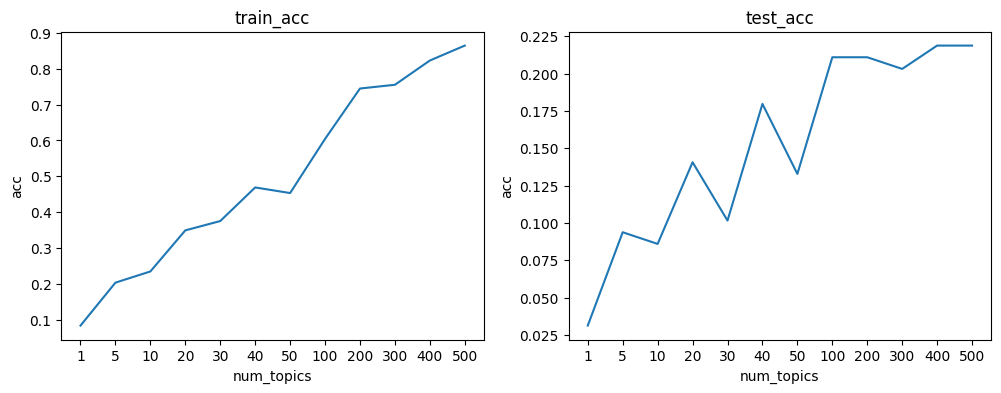

In [89]:
import matplotlib.pyplot as plt

# 创建一个Figure对象和两个子图（Axes对象）
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))


x = num_topics_lst
new_x = np.arange(len(x))
y1 = accuracy_train_lst
y2 = accuracy_test_lst

axes[0].plot(new_x, y1)
axes[0].set_title("train_acc")
axes[0].set_xticks(new_x)
axes[0].set_xticklabels(x)
axes[0].set_xlabel('num_topics')
axes[0].set_ylabel('acc')

axes[1].plot(new_x, y2)
axes[1].set_title("test_acc")
axes[1].set_xticks(new_x)
axes[1].set_xticklabels(x)
axes[1].set_xlabel('num_topics')
axes[1].set_ylabel('acc')

# 显示图像
plt.show()

<p style="color: red; font-size: 16px; line-height: 2;">结果分析：可以看到不同主题数对于分类准确有着很大的影响，主题数过少时，SVM分类器获得的主题分布的特征向量维度太小，有用的信息太少，SVM分类器训练会产生欠拟合。但是随着设定的LDA模型的主题数增加，得到的主题分布的特征向量维度增加，更多信息可以供SVM分类器学习，训练集准确率和测试集准确率都会随之上升。但是在100个主题数之后，随着主题数增加，虽然训练集准确率仍然不断上升，但是测试集准确率不变，同时观察测试结果可以发现，预测结果很多都为同一个类，可知SVM分类器模型发生了过拟合现象，特征冗余严重。</p>

### 3.6.固定段落数paragraph_num与主题数num_topics，观察段落词数paragraph_length对训练集与测试集分类准确率的影响

这里将主题数定为100，每篇小说抽取段落数为20，每个段落词数依次设定为[500,1000,1500,2000,2500,3000,3500,4000,4500,5000]，训练集与测试集为6:4

In [90]:
paragraph_length_lst = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
accuracy_train_lst = []
accuracy_test_lst = []
for paragraph_length in paragraph_length_lst:
    accuracy_train, accuracy_test = main(text_dict, paragraph_num=20, paragraph_length=paragraph_length, num_topics=100, use_character=False, random_consistent=False)
    accuracy_train_lst.append(accuracy_train)
    accuracy_test_lst.append(accuracy_test)

训练集特征矩阵大小为: (192, 100)
测试集特征矩阵大小为: (128, 100)
[5, 5, 6, 6, 2, 5, 14, 2, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 10, 6, 5, 6, 2, 6, 5, 5, 5, 5, 5, 5, 5, 2, 2, 6, 5, 0, 5, 15, 10, 5, 2, 6, 6, 5, 15, 5, 6, 5, 5, 2, 14, 6, 15, 5, 5, 5, 2, 6, 15, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 10, 5, 6, 5, 5, 1, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 3, 6, 2, 1, 5, 5, 6, 6, 5, 6, 6, 0, 5, 6, 5, 5, 5, 5, 5, 13, 5, 5, 6, 5, 6, 2, 2, 5, 5]
[5, 4, 4, 8, 15, 3, 14, 2, 13, 6, 6, 3, 12, 15, 7, 10, 13, 12, 7, 1, 1, 11, 2, 9, 10, 5, 7, 13, 2, 8, 3, 8, 10, 2, 12, 11, 4, 11, 2, 9, 14, 0, 1, 15, 10, 7, 3, 8, 4, 9, 15, 7, 9, 4, 8, 1, 14, 13, 7, 13, 13, 3, 0, 6, 15, 1, 3, 3, 6, 4, 7, 11, 0, 9, 11, 14, 4, 0, 8, 10, 1, 4, 8, 7, 14, 11, 9, 13, 10, 13, 12, 15, 12, 15, 9, 3, 7, 12, 13, 3, 13, 2, 11, 5, 9, 12, 6, 4, 12, 0, 10, 13, 4, 7, 0, 1, 5, 11, 12, 14, 13, 11, 14, 6, 4, 2, 7, 8]
Train Accuracy: 58.85%
Test Accuracy: 17.97%
训练集特征矩阵大小为: (192, 100)
测试集特征矩阵大小为: (128, 100)
[6, 8, 8, 2, 5, 10, 6, 13, 8, 8,

训练集特征矩阵大小为: (192, 100)
测试集特征矩阵大小为: (128, 100)
[14, 14, 15, 12, 5, 10, 0, 2, 12, 15, 12, 2, 13, 6, 2, 10, 0, 2, 11, 7, 6, 14, 12, 2, 14, 0, 11, 2, 2, 0, 10, 5, 7, 2, 12, 2, 14, 2, 2, 15, 10, 9, 13, 11, 12, 7, 6, 2, 2, 12, 10, 2, 13, 9, 14, 12, 2, 2, 6, 7, 2, 8, 2, 11, 2, 12, 6, 15, 12, 15, 12, 2, 2, 14, 2, 15, 9, 9, 2, 5, 11, 0, 0, 0, 2, 2, 5, 8, 2, 12, 6, 12, 2, 12, 7, 2, 10, 5, 10, 10, 12, 11, 6, 2, 2, 14, 10, 12, 12, 12, 14, 12, 12, 0, 14, 7, 12, 12, 2, 10, 2, 12, 2, 0, 12, 2, 6, 0]
[14, 14, 15, 4, 11, 10, 0, 9, 4, 1, 13, 1, 13, 6, 5, 10, 0, 4, 7, 11, 6, 14, 13, 7, 14, 7, 11, 5, 7, 7, 10, 13, 7, 4, 14, 7, 14, 8, 8, 1, 10, 9, 13, 11, 13, 11, 6, 1, 7, 14, 10, 9, 13, 11, 14, 12, 8, 8, 6, 9, 1, 8, 4, 11, 2, 3, 6, 15, 3, 15, 5, 1, 3, 14, 13, 15, 15, 11, 1, 11, 13, 0, 0, 0, 7, 2, 3, 5, 1, 3, 6, 5, 1, 12, 15, 4, 10, 13, 10, 10, 9, 3, 6, 5, 2, 14, 10, 12, 5, 12, 14, 14, 13, 0, 14, 9, 9, 12, 8, 10, 7, 14, 2, 0, 4, 4, 6, 0]
Train Accuracy: 53.65%
Test Accuracy: 45.31%


进行画图，观察训练集准确率以及测试集准确率随着主题数增加的变化

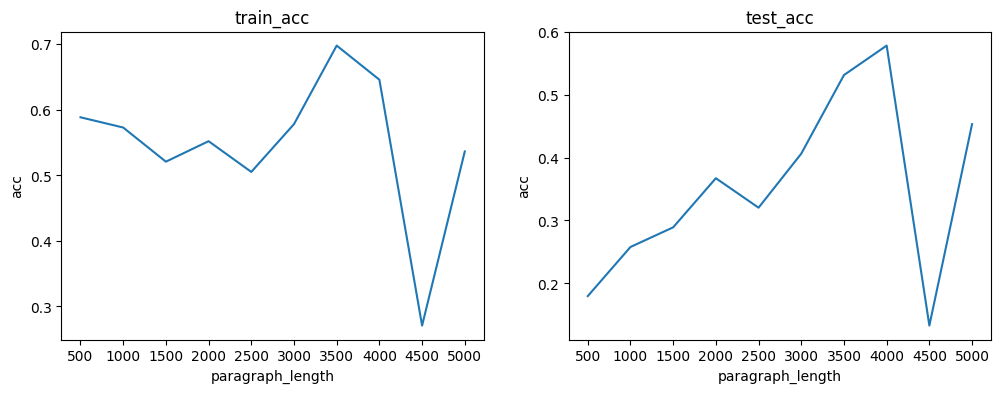

In [91]:
import matplotlib.pyplot as plt

# 创建一个Figure对象和两个子图（Axes对象）
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))


x = paragraph_length_lst
new_x = np.arange(len(x))
y1 = accuracy_train_lst
y2 = accuracy_test_lst

axes[0].plot(new_x, y1)
axes[0].set_title("train_acc")
axes[0].set_xticks(new_x)
axes[0].set_xticklabels(x)
axes[0].set_xlabel('paragraph_length')
axes[0].set_ylabel('acc')

axes[1].plot(new_x, y2)
axes[1].set_title("test_acc")
axes[1].set_xticks(new_x)
axes[1].set_xticklabels(x)
axes[1].set_xlabel('paragraph_length')
axes[1].set_ylabel('acc')

# 显示图像
plt.show()

<p style="color: red; font-size: 16px; line-height: 2;">结果分析：可以看到不同段落词数对于分类准确有着很大的影响，段落词数过少时，LDA模型获取的信息太少，无法准确地归纳出主题分布，最终会导致SVM分类器欠拟合，测试集准确率低。当随着段落词数增加，测试集准确率逐渐上升，可以说明段落词数的增加在一定程度上帮助了LDA模型更好地获得主题分布，有了更准确的主题分布，SVM分类器也就更加容易地进行分类测试，测试集准确率高。而在段落词数为4500的时候，出现了一个异常点，训练集和测试集准确率都不高，观察预测结果可以发现很多段落都预测为了来自第11篇小说，可以得知模型发生了过拟合，由于每次改变参数，模型的训练集与测试集划分都是随机的，每次都不同，很有可能某个类的数据在测试集或者是训练集里过少导致的</p>

### 3.7.固定段落词数paragraph_length与主题数num_topics，观察段落数paragraph_num对训练集与测试集分类准确率的影响

这里将主题数定为100，每篇小说抽取段落的词数为2000，每个段落词数依次设定为[20,30,40,50,60,70,80]，训练集与测试集为6:4

In [92]:
paragraph_num_lst = [20,30,40,50,60,70,80]
accuracy_train_lst = []
accuracy_test_lst = []
for paragraph_num in paragraph_num_lst:
    accuracy_train, accuracy_test = main(text_dict, paragraph_num=paragraph_num, paragraph_length=2000, num_topics=100, use_character=False, random_consistent=False)
    accuracy_train_lst.append(accuracy_train)
    accuracy_test_lst.append(accuracy_test)

训练集特征矩阵大小为: (192, 100)
测试集特征矩阵大小为: (128, 100)
[12, 7, 8, 12, 8, 3, 2, 11, 8, 4, 8, 8, 8, 8, 8, 14, 10, 8, 14, 9, 8, 12, 6, 11, 8, 8, 3, 9, 8, 8, 15, 2, 12, 8, 8, 10, 3, 4, 8, 2, 11, 12, 6, 4, 15, 2, 8, 8, 3, 7, 9, 14, 3, 7, 4, 10, 6, 8, 10, 1, 3, 8, 4, 14, 8, 4, 9, 11, 11, 8, 11, 10, 11, 9, 8, 8, 8, 2, 8, 8, 11, 8, 10, 12, 10, 10, 9, 0, 2, 3, 10, 14, 6, 14, 8, 8, 8, 10, 3, 8, 7, 8, 8, 13, 14, 8, 8, 8, 3, 8, 14, 0, 8, 10, 12, 8, 0, 2, 9, 12, 9, 8, 9, 11, 13, 8, 8, 0]
[12, 6, 8, 12, 8, 15, 3, 15, 8, 5, 9, 13, 4, 3, 8, 14, 10, 4, 14, 7, 11, 15, 12, 11, 5, 4, 6, 9, 1, 3, 3, 2, 15, 5, 9, 10, 15, 5, 8, 2, 2, 12, 6, 5, 15, 12, 13, 13, 0, 15, 1, 14, 2, 3, 5, 10, 6, 1, 10, 1, 0, 4, 5, 14, 9, 4, 7, 11, 5, 1, 2, 9, 11, 7, 9, 0, 1, 2, 9, 5, 11, 1, 11, 15, 10, 4, 0, 0, 6, 3, 10, 14, 6, 14, 1, 9, 15, 10, 3, 0, 5, 1, 4, 3, 14, 1, 12, 8, 2, 1, 14, 0, 13, 10, 12, 4, 0, 6, 7, 12, 7, 7, 15, 5, 13, 9, 7, 0]
Train Accuracy: 56.25%
Test Accuracy: 37.50%
训练集特征矩阵大小为: (288, 100)
测试集特征矩阵大小为: (192, 100)
[2, 4, 1

Train Accuracy: 62.50%
Test Accuracy: 52.60%
训练集特征矩阵大小为: (672, 100)
测试集特征矩阵大小为: (448, 100)
[10, 3, 11, 6, 4, 15, 10, 1, 7, 10, 8, 3, 2, 15, 3, 6, 7, 6, 6, 15, 5, 2, 7, 14, 10, 3, 2, 6, 7, 3, 5, 4, 3, 5, 12, 11, 8, 15, 5, 15, 8, 7, 3, 0, 12, 10, 10, 12, 1, 3, 0, 12, 3, 10, 7, 8, 8, 12, 13, 4, 3, 2, 8, 5, 4, 3, 12, 12, 3, 6, 2, 4, 4, 11, 3, 3, 4, 10, 10, 3, 7, 3, 15, 6, 13, 3, 3, 4, 3, 7, 14, 7, 10, 3, 8, 3, 0, 14, 13, 3, 8, 10, 11, 7, 6, 13, 11, 4, 13, 6, 0, 10, 15, 15, 11, 3, 4, 5, 10, 10, 7, 14, 5, 3, 4, 4, 0, 1, 5, 5, 8, 14, 3, 6, 5, 4, 15, 14, 5, 0, 5, 4, 6, 8, 13, 3, 8, 11, 11, 3, 10, 13, 3, 6, 1, 2, 5, 13, 14, 10, 1, 6, 3, 8, 15, 15, 15, 4, 1, 1, 13, 13, 0, 2, 8, 13, 13, 14, 3, 4, 13, 12, 3, 1, 3, 4, 9, 7, 14, 14, 6, 15, 13, 10, 1, 12, 5, 8, 2, 14, 7, 0, 4, 4, 7, 5, 13, 2, 13, 3, 10, 3, 6, 3, 2, 8, 14, 8, 4, 10, 11, 4, 6, 4, 5, 12, 5, 7, 4, 6, 0, 11, 3, 0, 14, 14, 2, 11, 15, 8, 6, 5, 11, 15, 10, 7, 3, 3, 13, 2, 15, 6, 0, 11, 3, 10, 14, 3, 15, 14, 4, 4, 0, 7, 0, 4, 15, 15, 3, 13, 4

进行画图，观察训练集准确率以及测试集准确率随着主题数增加的变化

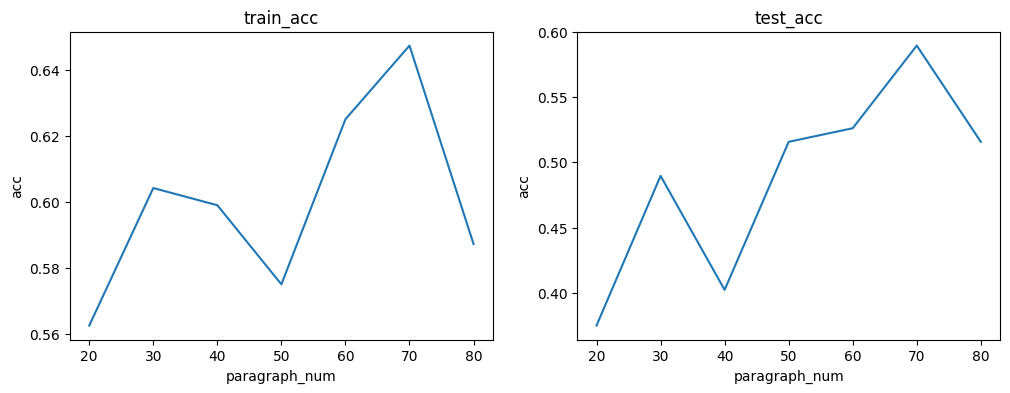

In [93]:
import matplotlib.pyplot as plt

# 创建一个Figure对象和两个子图（Axes对象）
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))


x = paragraph_num_lst
new_x = np.arange(len(x))
y1 = accuracy_train_lst
y2 = accuracy_test_lst

axes[0].plot(new_x, y1)
axes[0].set_title("train_acc")
axes[0].set_xticks(new_x)
axes[0].set_xticklabels(x)
axes[0].set_xlabel('paragraph_num')
axes[0].set_ylabel('acc')

axes[1].plot(new_x, y2)
axes[1].set_title("test_acc")
axes[1].set_xticks(new_x)
axes[1].set_xticklabels(x)
axes[1].set_xlabel('paragraph_num')
axes[1].set_ylabel('acc')

# 显示图像
plt.show()

<p style="color: red; font-size: 16px; line-height: 2;">结果分析：可以看到不同段落数对于分类准确有着一定的影响，段落数过少时，LDA模型获取的信息太少，无法准确地归纳出主题分布，而且SVM分类器训练集太少，最终会导致SVM分类器欠拟合，测试集准确率较低。当随着段落数增加，测试集准确率逐渐上升一些，可以说明段落数的增加在一定程度上帮助了LDA模型更好地获得主题分布，同时增加了SVM分类器的训练集样本数，SVM分类器也就更加容易地进行分类测试，测试集准确率高。</p>

### 3.8.探究分别以字和词为基本单元对段落分类的影响

综合以上的实验，最终选择主题数为100，段落长度为1000，段落数为70这三个参数，分别探究

In [94]:
accuracy_train_character, accuracy_test_character = main(text_dict, paragraph_num=70, paragraph_length=1000, num_topics=100, use_character=True, random_consistent=False)
accuracy_train_word, accuracy_test_word = main(text_dict, paragraph_num=70, paragraph_length=1000, num_topics=100, use_character=False, random_consistent=False)

训练集特征矩阵大小为: (672, 100)
测试集特征矩阵大小为: (448, 100)
[9, 0, 13, 12, 9, 1, 13, 13, 7, 6, 6, 5, 12, 5, 2, 1, 1, 14, 15, 2, 13, 9, 6, 13, 10, 0, 13, 2, 8, 13, 1, 0, 6, 13, 1, 7, 2, 7, 7, 2, 2, 12, 0, 4, 6, 9, 2, 14, 10, 0, 12, 4, 14, 13, 13, 13, 13, 11, 6, 14, 0, 14, 6, 3, 0, 2, 13, 2, 13, 13, 12, 8, 13, 12, 10, 13, 0, 10, 0, 1, 6, 13, 13, 1, 0, 14, 10, 5, 4, 15, 0, 15, 5, 0, 10, 13, 13, 13, 0, 0, 4, 10, 1, 12, 15, 0, 13, 10, 2, 10, 0, 1, 13, 9, 5, 9, 9, 0, 11, 10, 13, 15, 7, 0, 5, 14, 1, 13, 13, 12, 9, 1, 0, 12, 10, 5, 3, 13, 12, 2, 1, 0, 14, 13, 5, 15, 2, 6, 11, 0, 7, 7, 13, 8, 0, 13, 14, 14, 12, 0, 6, 13, 1, 13, 6, 13, 10, 13, 0, 14, 0, 2, 10, 1, 0, 0, 12, 15, 14, 1, 15, 0, 2, 15, 13, 1, 12, 2, 6, 13, 5, 15, 1, 13, 12, 1, 0, 13, 13, 0, 1, 1, 15, 10, 0, 2, 13, 5, 0, 2, 2, 5, 10, 10, 4, 12, 15, 0, 12, 8, 7, 6, 12, 13, 4, 13, 0, 1, 13, 13, 10, 5, 15, 14, 1, 9, 3, 10, 1, 8, 4, 2, 4, 13, 13, 0, 6, 15, 0, 4, 15, 6, 10, 6, 15, 10, 7, 2, 12, 0, 7, 2, 5, 12, 13, 0, 9, 4, 9, 15, 0, 12, 14, 4, 13, 12, 1

<p style="color: red; font-size: 16px; line-height: 2;">结果分析：以字为单位的训练集准确率为62.95%，测试集准确率为52.90%，而以词为单位的训练集准确率为68.60%，测试集准确率为56.70%，较字相比有所提升，因为基于词的LDA模型可以更加准确地丰富地获得文章的信息，从而更好地获得主题分布，更有利于SVM分类</p>